In [115]:
from google.colab import files
uploaded = files.upload()

Saving Quotes.xlsx to Quotes (2).xlsx


In [116]:
import pandas as pd
data=pd.read_excel('Quotes (2).xlsx')

In [117]:
data=data.sample(frac=1).reset_index(drop=True)
data

,Sentences,Output
0,Hard work is the key to success.,1
1,"Keep panicking, keep being miserable.",0
2,"Success is not an accident, it is hard work, p...",1
3,Try your best everyday,1
4,Right now is the moment to get started.,1
5,Stay demotivated.,0
6,It is going to get worse anyway.,0
7,Death is forever.,0
8,Always complain.,0
9,Yes it is going to be hard but it is going to ...,1


In [185]:
#data.shape

In [119]:
print(list(data))

['Sentences', 'Output']


In [120]:
data['Sentences']=data['Sentences'].str.lower()
eg=data.iloc[0]
print(eg['Sentences'])
print(eg['Output'])

hard work is the key to success.
1


In [121]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [122]:
def identify_tokens(row):
    Sentences = row['Sentences']
    tokens = nltk.word_tokenize(Sentences)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

data['words'] = data.apply(identify_tokens, axis=1)

In [123]:
data.head()

,Sentences,Output,words
0,hard work is the key to success.,1,"[hard, work, is, the, key, to, success]"
1,"keep panicking, keep being miserable.",0,"[keep, panicking, keep, being, miserable]"
2,"success is not an accident, it is hard work, p...",1,"[success, is, not, an, accident, it, is, hard,..."
3,try your best everyday,1,"[try, your, best, everyday]"
4,right now is the moment to get started.,1,"[right, now, is, the, moment, to, get, started]"


In [124]:
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [125]:
def stem_list(row):
    my_list = row['words']
    stemmed_list = [stemming.stem(word) for word in my_list]
    return (stemmed_list)

data['stemmed_words'] = data.apply(stem_list, axis=1)

In [126]:
data.head()

,Sentences,Output,words,stemmed_words
0,hard work is the key to success.,1,"[hard, work, is, the, key, to, success]","[hard, work, is, the, key, to, success]"
1,"keep panicking, keep being miserable.",0,"[keep, panicking, keep, being, miserable]","[keep, panick, keep, be, miser]"
2,"success is not an accident, it is hard work, p...",1,"[success, is, not, an, accident, it, is, hard,...","[success, is, not, an, accid, it, is, hard, wo..."
3,try your best everyday,1,"[try, your, best, everyday]","[tri, your, best, everyday]"
4,right now is the moment to get started.,1,"[right, now, is, the, moment, to, get, started]","[right, now, is, the, moment, to, get, start]"


In [127]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [128]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english")) 

In [129]:
def remove_stops(row):
    my_list = row['stemmed_words']
    meaningful_words = [w for w in my_list if not w in stops]
    return (meaningful_words)

data['stem_meaningful'] = data.apply(remove_stops, axis=1)

In [130]:
data.head()

,Sentences,Output,words,stemmed_words,stem_meaningful
0,hard work is the key to success.,1,"[hard, work, is, the, key, to, success]","[hard, work, is, the, key, to, success]","[hard, work, key, success]"
1,"keep panicking, keep being miserable.",0,"[keep, panicking, keep, being, miserable]","[keep, panick, keep, be, miser]","[keep, panick, keep, miser]"
2,"success is not an accident, it is hard work, p...",1,"[success, is, not, an, accident, it, is, hard,...","[success, is, not, an, accid, it, is, hard, wo...","[success, accid, hard, work, persever, learn, ..."
3,try your best everyday,1,"[try, your, best, everyday]","[tri, your, best, everyday]","[tri, best, everyday]"
4,right now is the moment to get started.,1,"[right, now, is, the, moment, to, get, started]","[right, now, is, the, moment, to, get, start]","[right, moment, get, start]"


In [131]:
def rejoin_words(row):
    my_list = row['stem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

data['processed'] = data.apply(rejoin_words, axis=1)
data.head()

,Sentences,Output,words,stemmed_words,stem_meaningful,processed
0,hard work is the key to success.,1,"[hard, work, is, the, key, to, success]","[hard, work, is, the, key, to, success]","[hard, work, key, success]",hard work key success
1,"keep panicking, keep being miserable.",0,"[keep, panicking, keep, being, miserable]","[keep, panick, keep, be, miser]","[keep, panick, keep, miser]",keep panick keep miser
2,"success is not an accident, it is hard work, p...",1,"[success, is, not, an, accident, it, is, hard,...","[success, is, not, an, accid, it, is, hard, wo...","[success, accid, hard, work, persever, learn, ...",success accid hard work persever learn studi s...
3,try your best everyday,1,"[try, your, best, everyday]","[tri, your, best, everyday]","[tri, best, everyday]",tri best everyday
4,right now is the moment to get started.,1,"[right, now, is, the, moment, to, get, started]","[right, now, is, the, moment, to, get, start]","[right, moment, get, start]",right moment get start


In [132]:
df=data[['processed','Output']]
df.head()

,processed,Output
0,hard work key success,1
1,keep panick keep miser,0
2,success accid hard work persever learn studi s...,1
3,tri best everyday,1
4,right moment get start,1


In [133]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 

In [134]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [135]:
def lem_list(row):
    my_list = row['words']
    stemmed_list = [lemmatizer.lemmatize(word) for word in my_list]
    return (stemmed_list)

data['lemmetized_words'] = data.apply(lem_list, axis=1)
data.head()

,Sentences,Output,words,stemmed_words,stem_meaningful,processed,lemmetized_words
0,hard work is the key to success.,1,"[hard, work, is, the, key, to, success]","[hard, work, is, the, key, to, success]","[hard, work, key, success]",hard work key success,"[hard, work, is, the, key, to, success]"
1,"keep panicking, keep being miserable.",0,"[keep, panicking, keep, being, miserable]","[keep, panick, keep, be, miser]","[keep, panick, keep, miser]",keep panick keep miser,"[keep, panicking, keep, being, miserable]"
2,"success is not an accident, it is hard work, p...",1,"[success, is, not, an, accident, it, is, hard,...","[success, is, not, an, accid, it, is, hard, wo...","[success, accid, hard, work, persever, learn, ...",success accid hard work persever learn studi s...,"[success, is, not, an, accident, it, is, hard,..."
3,try your best everyday,1,"[try, your, best, everyday]","[tri, your, best, everyday]","[tri, best, everyday]",tri best everyday,"[try, your, best, everyday]"
4,right now is the moment to get started.,1,"[right, now, is, the, moment, to, get, started]","[right, now, is, the, moment, to, get, start]","[right, moment, get, start]",right moment get start,"[right, now, is, the, moment, to, get, started]"


In [136]:
def remove_stops2(row):
    my_list2 = row['lemmetized_words']
    meaningful_words2 = [w for w in my_list2 if not w in stops]
    return (meaningful_words2)

data['lem_meaningful'] = data.apply(remove_stops2, axis=1)
data.head()

,Sentences,Output,words,stemmed_words,stem_meaningful,processed,lemmetized_words,lem_meaningful
0,hard work is the key to success.,1,"[hard, work, is, the, key, to, success]","[hard, work, is, the, key, to, success]","[hard, work, key, success]",hard work key success,"[hard, work, is, the, key, to, success]","[hard, work, key, success]"
1,"keep panicking, keep being miserable.",0,"[keep, panicking, keep, being, miserable]","[keep, panick, keep, be, miser]","[keep, panick, keep, miser]",keep panick keep miser,"[keep, panicking, keep, being, miserable]","[keep, panicking, keep, miserable]"
2,"success is not an accident, it is hard work, p...",1,"[success, is, not, an, accident, it, is, hard,...","[success, is, not, an, accid, it, is, hard, wo...","[success, accid, hard, work, persever, learn, ...",success accid hard work persever learn studi s...,"[success, is, not, an, accident, it, is, hard,...","[success, accident, hard, work, perseverance, ..."
3,try your best everyday,1,"[try, your, best, everyday]","[tri, your, best, everyday]","[tri, best, everyday]",tri best everyday,"[try, your, best, everyday]","[try, best, everyday]"
4,right now is the moment to get started.,1,"[right, now, is, the, moment, to, get, started]","[right, now, is, the, moment, to, get, start]","[right, moment, get, start]",right moment get start,"[right, now, is, the, moment, to, get, started]","[right, moment, get, started]"


In [137]:
def rejoin_words2(row):
    my_list = row['lem_meaningful']
    joined_words = ( " ".join(my_list))
    return joined_words

data['processed_f'] = data.apply(rejoin_words2, axis=1)
data.head()

,Sentences,Output,words,stemmed_words,stem_meaningful,processed,lemmetized_words,lem_meaningful,processed_f
0,hard work is the key to success.,1,"[hard, work, is, the, key, to, success]","[hard, work, is, the, key, to, success]","[hard, work, key, success]",hard work key success,"[hard, work, is, the, key, to, success]","[hard, work, key, success]",hard work key success
1,"keep panicking, keep being miserable.",0,"[keep, panicking, keep, being, miserable]","[keep, panick, keep, be, miser]","[keep, panick, keep, miser]",keep panick keep miser,"[keep, panicking, keep, being, miserable]","[keep, panicking, keep, miserable]",keep panicking keep miserable
2,"success is not an accident, it is hard work, p...",1,"[success, is, not, an, accident, it, is, hard,...","[success, is, not, an, accid, it, is, hard, wo...","[success, accid, hard, work, persever, learn, ...",success accid hard work persever learn studi s...,"[success, is, not, an, accident, it, is, hard,...","[success, accident, hard, work, perseverance, ...",success accident hard work perseverance learni...
3,try your best everyday,1,"[try, your, best, everyday]","[tri, your, best, everyday]","[tri, best, everyday]",tri best everyday,"[try, your, best, everyday]","[try, best, everyday]",try best everyday
4,right now is the moment to get started.,1,"[right, now, is, the, moment, to, get, started]","[right, now, is, the, moment, to, get, start]","[right, moment, get, start]",right moment get start,"[right, now, is, the, moment, to, get, started]","[right, moment, get, started]",right moment get started


In [138]:
df2=data[['processed_f','Output']]
df2.head()

,processed_f,Output
0,hard work key success,1
1,keep panicking keep miserable,0
2,success accident hard work perseverance learni...,1
3,try best everyday,1
4,right moment get started,1


In [139]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [146]:
sentences=df2['processed_f'].values
y=df2['Output'].values
print(sentences.shape, y.shape)

(50,) (50,)


In [147]:
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=123)

In [148]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [149]:
X_train
print(X_train.toarray())
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['accident', 'achieved', 'always', 'anything', 'anyway', 'attitude', 'bad', 'best', 'big', 'coming', 'confident', 'cry', 'day', 'death', 'demotivated', 'destination', 'done', 'dream', 'early', 'eat', 'ego', 'else', 'enjoy', 'escape', 'ever', 'everybody', 'everyday', 'everyone', 'fit', 'focus', 'forever', 'get', 'give', 'goal', 'going', 'good', 'happen', 'happiness', 'hard', 'harder', 'help', 'jealous', 'journey', 'keep', 'key', 'kind', 'last', 'late', 'laziness', 'lazy', 'learning', 'life', 'limit', 'live', 'love', 'lying', 'make', 'matter', 'miserable', 'moment', 'never', 'one', 'others', 'panicking', 'perseverance', 'plan', 'positive', 'push', 'respect', 'right', 'sacrifice', 'sad', 'show', 'sleep', 'sleeping', 'something', 'start', 'started', 'stay', 'studying', 'succeed', 'success', 'successful', 'suck', 'sweat', 'sympathy', 'temporary', 'thing', 'time', 'try', 'w

In [150]:
vectorizer.vocabulary_

{'accident': 0,
 'achieved': 1,
 'always': 2,
 'anything': 3,
 'anyway': 4,
 'attitude': 5,
 'bad': 6,
 'best': 7,
 'big': 8,
 'coming': 9,
 'confident': 10,
 'cry': 11,
 'day': 12,
 'death': 13,
 'demotivated': 14,
 'destination': 15,
 'done': 16,
 'dream': 17,
 'early': 18,
 'eat': 19,
 'ego': 20,
 'else': 21,
 'enjoy': 22,
 'escape': 23,
 'ever': 24,
 'everybody': 25,
 'everyday': 26,
 'everyone': 27,
 'fit': 28,
 'focus': 29,
 'forever': 30,
 'get': 31,
 'give': 32,
 'goal': 33,
 'going': 34,
 'good': 35,
 'happen': 36,
 'happiness': 37,
 'hard': 38,
 'harder': 39,
 'help': 40,
 'jealous': 41,
 'journey': 42,
 'keep': 43,
 'key': 44,
 'kind': 45,
 'last': 46,
 'late': 47,
 'laziness': 48,
 'lazy': 49,
 'learning': 50,
 'life': 51,
 'limit': 52,
 'live': 53,
 'love': 54,
 'lying': 55,
 'make': 56,
 'matter': 57,
 'miserable': 58,
 'moment': 59,
 'never': 60,
 'one': 61,
 'others': 62,
 'panicking': 63,
 'perseverance': 64,
 'plan': 65,
 'positive': 66,
 'push': 67,
 'respect': 68,
 

In [151]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [156]:
input_dim = X_train.shape[1]
model = Sequential()
model.add(Dense(48, input_dim=input_dim, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [157]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 48)                4896      
_________________________________________________________________
dense_25 (Dense)             (None, 12)                588       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 5,597
Trainable params: 5,597
Non-trainable params: 0
_________________________________________________________________
None


In [158]:
history = model.fit(X_train,y_train,
                    epochs=15,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=5)

Epoch 1/15
8/8 [==============================] - 0s 14ms/step - loss: 0.6844 - accuracy: 0.5500 - val_loss: 0.7058 - val_accuracy: 0.4000
Epoch 2/15
8/8 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.5500 - val_loss: 0.7061 - val_accuracy: 0.4000
Epoch 3/15
8/8 [==============================] - 0s 3ms/step - loss: 0.6600 - accuracy: 0.5500 - val_loss: 0.7061 - val_accuracy: 0.4000
Epoch 4/15
8/8 [==============================] - 0s 3ms/step - loss: 0.6487 - accuracy: 0.5750 - val_loss: 0.7065 - val_accuracy: 0.4000
Epoch 5/15
8/8 [==============================] - 0s 2ms/step - loss: 0.6369 - accuracy: 0.6000 - val_loss: 0.7062 - val_accuracy: 0.4000
Epoch 6/15
8/8 [==============================] - 0s 2ms/step - loss: 0.6248 - accuracy: 0.6250 - val_loss: 0.7081 - val_accuracy: 0.4000
Epoch 7/15
8/8 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6750 - val_loss: 0.7081 - val_accuracy: 0.4000
Epoch 8/15
8/8 [=================

In [160]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9000
Testing Accuracy:  0.5000


In [168]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Acc')
    plt.plot(x, val_acc, 'r', label='Validation Acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training Loss')
    plt.plot(x, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

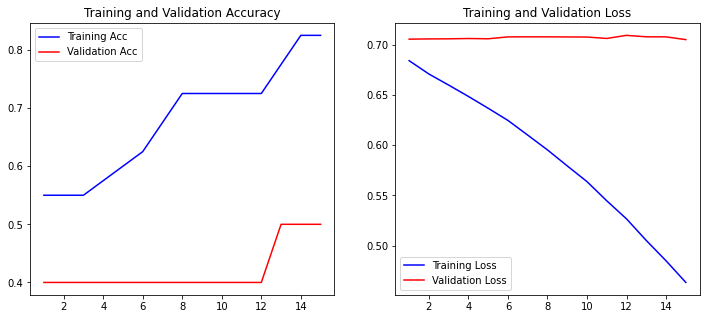

In [169]:
plot_history(history)

In [174]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [181]:
def pred(txt):
  tokenizer = Tokenizer(num_words = 101, filters='')
  seq = tokenizer.texts_to_sequences([txt])
  padded = pad_sequences(seq, maxlen = 101)
  pred = model.predict(padded)
  if(pred>0.5):
    print("'",txt,"'","is a Motivational Quote.")
  else:
    print("'",txt,"'","is a Demotivational Quote.")

In [182]:
pred("Work hard and smart to be successful")
pred("Stay positive and work hard")

' Work hard and smart to be successful ' is a Motivational Quote.
' Stay positive and work hard ' is a Motivational Quote.
